We are interested in understanding what impacts the mileage of cars. 400 cars were measured and its data is available in the file.

1) Train a decision tree and identify features that impact the mileage of cars. Note that cylinders though numerical can take only specific values, and origin is categorical.<br>
2) How good the prediction would be if we use 300 cars and test it for the rest of the data.<br>
3) Are there outliers that influence the result? How can we minimize the impact of outliers?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
mileage = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Tree-Based-Models-main/06_Car_mileage.csv')
mileage.head()

,cylinders,displacement,hp,weight,acceleration,origin,mpg
0,8,307.0,130,3504,12.0,1,18.0
1,8,350.0,165,3693,11.5,1,15.0
2,8,318.0,150,3436,11.0,1,18.0
3,8,304.0,150,3433,12.0,1,16.0
4,8,302.0,140,3449,10.5,1,17.0


In [3]:
# Check info
mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   hp            398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   origin        398 non-null    int64  
 6   mpg           398 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [4]:
# Check missing values
mileage.isnull().sum()

cylinders       0
displacement    0
hp              0
weight          0
acceleration    0
origin          0
mpg             0
dtype: int64

In [5]:
# hp is incorrectly stored as object, lets convert it into numeric
mileage['hp'] = pd.to_numeric(mileage['hp'], errors='coerce')
mileage.dropna(inplace=True)

In [6]:
# Lets check origin
mileage['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [7]:
# Given origin is categorical, lets convert it into dummies. Also cylinders even though numerical, can take only specific values
# So cylinders is discrete. Hence we will create dummies for cylinders also
mileage_onehot = pd.get_dummies(mileage, columns=['origin', 'cylinders'])
mileage_onehot.head()

,displacement,hp,weight,acceleration,mpg,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,307.0,130.0,3504,12.0,18.0,1,0,0,0,0,0,0,1
1,350.0,165.0,3693,11.5,15.0,1,0,0,0,0,0,0,1
2,318.0,150.0,3436,11.0,18.0,1,0,0,0,0,0,0,1
3,304.0,150.0,3433,12.0,16.0,1,0,0,0,0,0,0,1
4,302.0,140.0,3449,10.5,17.0,1,0,0,0,0,0,0,1


In [8]:
# Lets check the data types again
mileage_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   hp            392 non-null    float64
 2   weight        392 non-null    int64  
 3   acceleration  392 non-null    float64
 4   mpg           392 non-null    float64
 5   origin_1      392 non-null    uint8  
 6   origin_2      392 non-null    uint8  
 7   origin_3      392 non-null    uint8  
 8   cylinders_3   392 non-null    uint8  
 9   cylinders_4   392 non-null    uint8  
 10  cylinders_5   392 non-null    uint8  
 11  cylinders_6   392 non-null    uint8  
 12  cylinders_8   392 non-null    uint8  
dtypes: float64(4), int64(1), uint8(8)
memory usage: 21.4 KB


**1) Train a decision tree and identify features that impact the mileage of cars. Note that cylinders though numerical can take only specific values, and origin is categorical.**

In [9]:
# Prepare X and y
X = mileage_onehot.drop('mpg', axis=1)
y = mileage_onehot['mpg']

# Initialize the model
clf = DecisionTreeRegressor(random_state=42)

# Fit the model
clf.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [10]:
# feature that impact car mileage
pd.Series(clf.feature_importances_, index=X.columns)

displacement    0.620411
hp              0.210490
weight          0.062547
acceleration    0.080866
origin_1        0.000093
origin_2        0.007862
origin_3        0.004859
cylinders_3     0.000000
cylinders_4     0.000037
cylinders_5     0.001584
cylinders_6     0.011253
cylinders_8     0.000000
dtype: float64

**The 4 variables that impact car mileage are engine displacement, hp, weigh and acceleration of the car.**

**2) How good the prediction would be if we use 300 cars and test it for the rest of the data.**

In [11]:
# Split the data
X_train = X.iloc[:300,:]
y_train = y.iloc[:300]

X_test = X.iloc[300:,:]
y_test = y.iloc[300:]

In [12]:
# Check shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 12)
(300,)
(92, 12)
(92,)


In [13]:
# Initialize the model
clf_after_split = DecisionTreeRegressor(random_state=42)

# Use cross validation
params = {'max_depth':range(1,11), 'min_samples_split':range(10,60,10)}

# Create GridSearchCV object
clf_gs_after_split = GridSearchCV(estimator=clf_after_split, cv=5, param_grid=params)

# Fit
clf_gs_after_split.fit(X_train, y_train)

# Print best params and best score
print(clf_gs_after_split.best_params_)
print(clf_gs_after_split.best_score_)

{'max_depth': 2, 'min_samples_split': 10}
0.751200648170116


In [14]:
# Check score on test data
clf_gs_after_split.score(X_test, y_test)

-0.7847393001959428

**The score comes out to be negative !. Lets check the presence of outliers**

**3) Are there outliers that influence the result? How can we minimize the impact of outliers?**

<AxesSubplot:xlabel='mpg', ylabel='Density'>

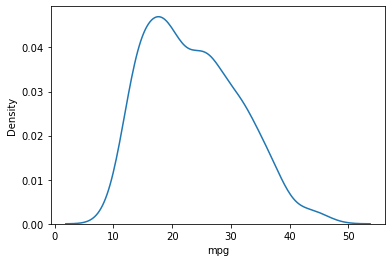

In [15]:
# Lets check distribution of y
sns.kdeplot(y)

**MPG is positively skewed. There might be outliers that influence the score**

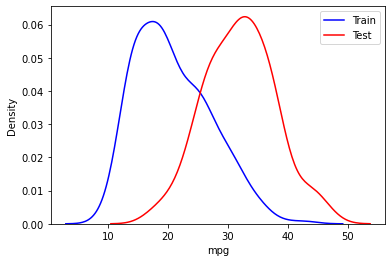

In [16]:
# Check the distribution of y on both train and test set
sns.kdeplot(y_train, color='blue', label='Train')
sns.kdeplot(y_test, color='red', label='Test')
plt.legend()

**Clearly two distributions do not match. Hence we get low score on test**

**We can do the following:**

1. Take random samples for Train and Test
2. Use MAE or Friedman MSE as the criterion for splitting
3. Treat the outliers when possible

In [17]:
# Lets check 1 and 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

params = {'min_samples_split' : [5,10,15,20],
          'min_samples_leaf' : [10,15,20],
          'max_depth' : [5,10,15],
          'criterion' : ['mse', 'friedman_mse', 'mae']}

clf_gs = GridSearchCV(DecisionTreeRegressor(), cv=5, param_grid=params)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20]})

In [18]:
clf_gs.best_params_, clf_gs.best_score_

({'criterion': 'mae',
  'max_depth': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 5},
 0.7334069195260706)

In [19]:
clf_gs.score(X_test, y_test)

0.6922149507908725

**The train and test scores are closer now**

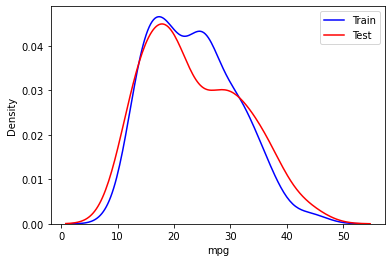

In [20]:
# Lets check the distribution
sns.kdeplot(y_train, color='blue', label='Train')
sns.kdeplot(y_test, color='red', label='Test')
plt.legend()
plt.show()

**The distribution of target y for both train and test are closer now**